In [2]:
# Ceilometer Line Plots, Filtering, and 2D Histogram Data.

In [8]:
---

SyntaxError: invalid syntax (1947214667.py, line 1)

In [9]:
import xarray as xr 
import netCDF4 as nc 
from matplotlib import pyplot as plt
import numpy as np
import scipy
import scipy.signal
from netCDF4 import Dataset
import xrscipy.other.signal as dsp
import pyart 

In [12]:
data = '/Users/tehreemqureshi/Downloads/smokey_CL61.nc'
ds = xr.open_dataset(data)
da = ds['backscatter']

In [13]:
## Line Plots with Ceilometer Data - Range versus Backscatter, time intervals 50, 1000, and 2000.

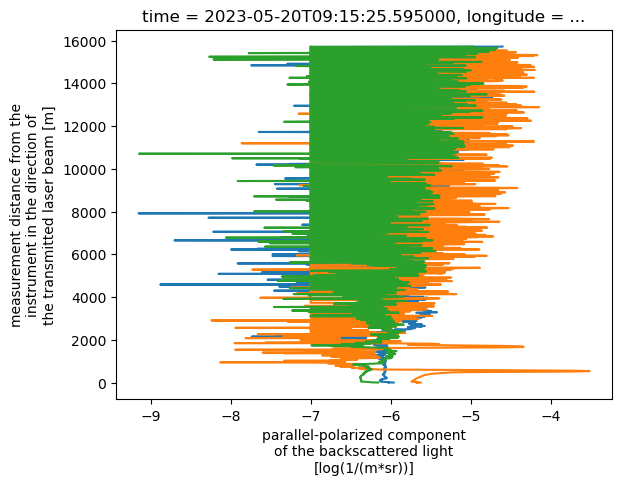

In [14]:
da.isel(time=50).plot(y="range")
da.isel(time=1000).plot(y="range")
da.isel(time=2000).plot(y="range")

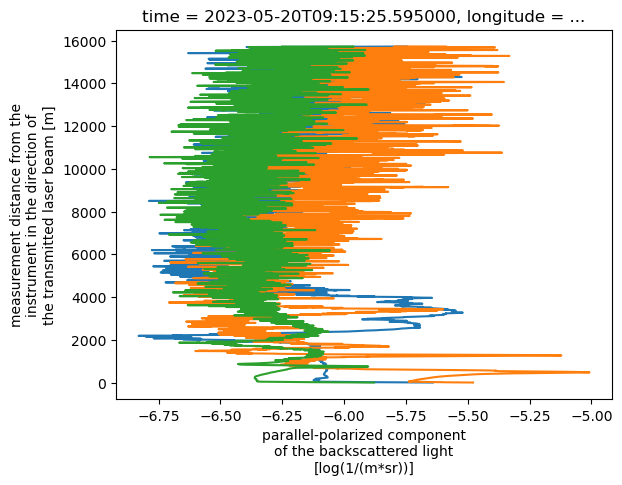

In [15]:
## Filtering out noise data and signal processing with moving window time. 
da.rolling(time=30).mean().isel(time=50).plot(y="range")
da.rolling(time=30).mean().isel(time=1000).plot(y="range")
da.rolling(time=30).mean().isel(time=2000).plot(y="range")

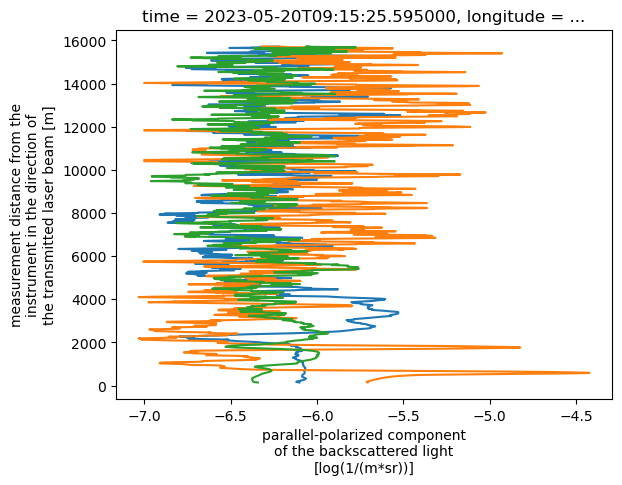

In [17]:
## Filtering Backscatter Data with moving window range.  
da.rolling(range=30).mean().isel(time=50).plot(y="range")
da.rolling(range=30).mean().isel(time=1000).plot(y="range")
da.rolling(range=30).mean().isel(time=2000).plot(y="range")

In [ ]:
## Comparison of unfiltered, filtered with time, and filtered with range data. 

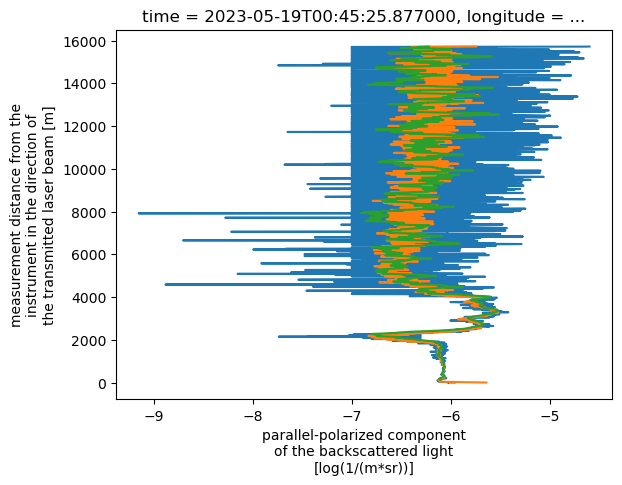

In [18]:
da.isel(time=50).plot(y="range")
da.rolling(time=30).mean().isel(time=50).plot(y="range")
da.rolling(range=30).mean().isel(time=50).plot(y="range")

In [23]:
## 2D Histogram of Unfiltered Backscatter Ceilometer Data (constant range=50).

Text(0.5, 1.0, '2D Histogram of Time versus Backscatter Values')

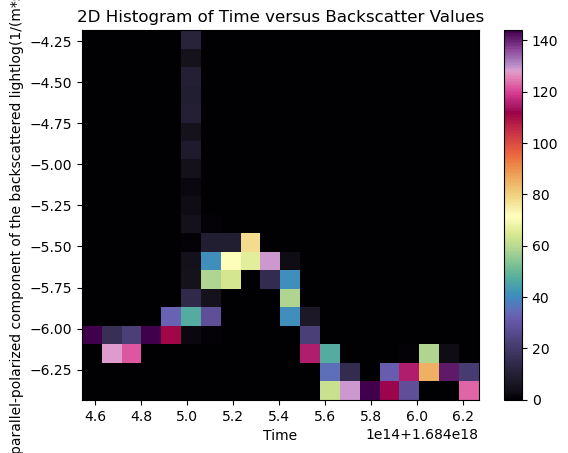

In [39]:
y = da.isel(range=50)
x = ds['backscatter'].time
plt.hist2d(x, y, bins=(20,20), cmap=pyart.graph.cm_colorblind.ChaseSpectral)
plt.colorbar()
plt.xlabel('Time')
plt.ylabel(da.long_name + da.units)
plt.title('2D Histogram of Time versus Backscatter Values')

In [ ]:
## 2D Histogram of Time Filtered Backscatter Ceilometer Data (moving window "time").

Text(0.5, 1.0, '2D Histogram of Time versus Backscatter Values (filtered)')

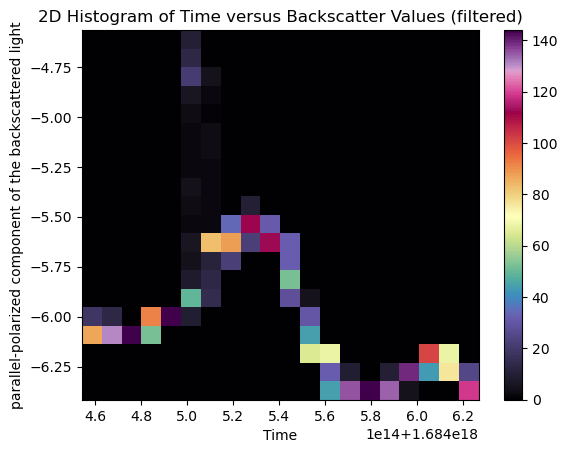

In [26]:
x = ds['backscatter'].time
y=da.rolling(time=30).mean().isel(range=50)
plt.hist2d(x, y, bins=(20,20), cmap=pyart.graph.cm_colorblind.ChaseSpectral)
plt.colorbar()
plt.xlabel('Time')
plt.ylabel(da.long_name)  
plt.title('2D Histogram of Time versus Backscatter Values (filtered)')

In [ ]:
## 2D Histogram of Time Filtered Backscatter Ceilometer Data (moving window "range").

Text(0.5, 1.0, '2D Histogram of Time versus Backscatter Values (filtered)')

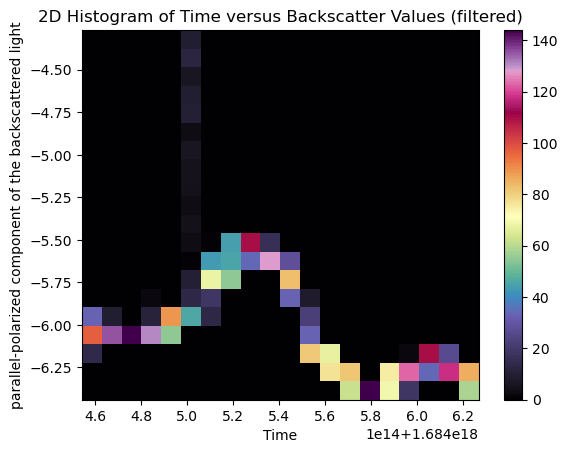

In [38]:
x = ds['backscatter'].time
y=da.rolling(range=30).mean().isel(range=50)
plt.hist2d(x, y, bins=(20,20), cmap=pyart.graph.cm_colorblind.ChaseSpectral)
plt.colorbar()
plt.xlabel('Time')
plt.ylabel(da.long_name)  
plt.title('2D Histogram of Time versus Backscatter Values (filtered)')

In [ ]:
---

In [ ]:
## Summary
# This notebook analyzed line plots regarding backscatter CL data, as well as signal processing through filtering with both time and range terators. 2D histograms were developed to analyze the PDF of backscatter values with timeto see how rain shafts affect frequency and range. 